### 3. Wykres rozkładu P(L) (prawdopodobieństwo długości trwania rozgrywki)
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a = b = 50.

Dla trzech różnych wartości p = 1/5, 1/2, 4/5 proszę wyznaczyć rozkład prawdopodobieństwa długości trwania rozgrywki (czyli ruiny dowolnego gracza) P(L).

Z tego rozkładu proszę wyznaczyć średnią i jej odchylenie standardowe.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simulate_ruin(capital_a: int, capital_b: int, p: float) -> tuple[int, int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    length = 0
    while capital_a != 0 and capital_b != 0:
        length += 1
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b, length

In [60]:
n_games = 10000
capital_a = capital_b = 50

ps = [0.2, 0.5, 0.8]
lenghts = {p: [] for p in ps}

for p in ps:
    for _ in range(n_games):
        _, _, length = simulate_ruin(capital_a, capital_b, p)
        lenghts[p].append(length)

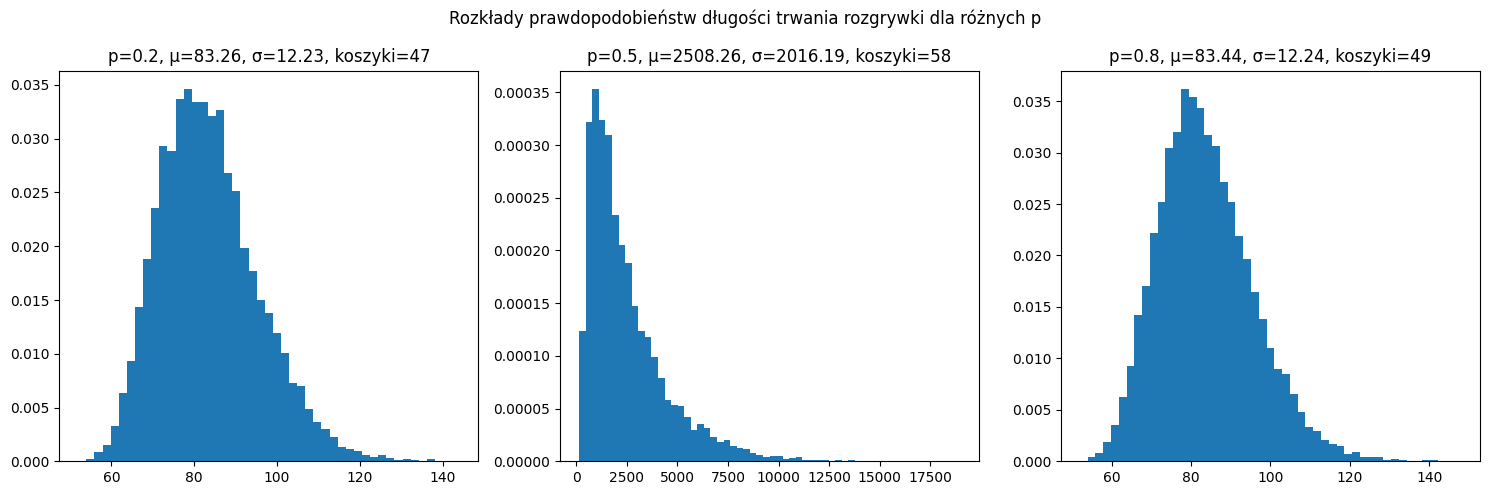

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Rozkłady prawdopodobieństw długości trwania rozgrywki dla różnych p")

for i, p in enumerate(ps):
    lengths_p = lenghts[p]
    mean_length = np.mean(lengths_p)
    std_length = np.std(lengths_p)

    bin_width = 3.49 * std_length / np.cbrt(n_games) # Scott's normal reference rule
    n_bins = np.ceil((max(lengths_p) - min(lengths_p)) / bin_width).astype(int)

    axes[i].hist(lengths_p, bins=n_bins, density=True)
    axes[i].set_title(f"p={p}, μ={mean_length:.2f}, σ={std_length:.2f}, koszyki={n_bins}")

plt.tight_layout()

to zadanie 3, czy 4, czy jeszcze cos innego? :P